# Introduction: 

- This notebook contains implementation trails for "Santander Customer Satisfaction" Kaggle Competition .. 
- The dataset related to this chellenge is (imbalanced dataset) such that more than 97% of the data represent (Satisfied customers)

### Problem: 
The existance of unsatisfied customers .. !

### Requirment:
Calculate the probability that each customer in te test set is an (Unsatisfied Customer) 

### Variables: 
1. 369 independent variables 
2. One output (Depdendent variable) represents Customer Satisfaction (0 is satisfied and 1 for Unsatisfied customers)

### Implementation Steps:
1. Data Preprocessing ..
2. Feature Reduction ..
3. Learning Task ..

### Type of Learning task:
It's a classification task as the output variable either zero ot one 

# Document Structure .. 
The structure of this document is as follows ..
1. Loading data from the file 
2. Data understanding phase .. 
    It contains statistical analysis and data preprocessing steps for the matter of understanding the data 
3. Feature Reduction
4. Learning Phase 
    The learning process occurs through applying three classification methods (Logistic Regression, ANN, and Decision Tree) 
5. Further Preprocessing steps for the sake of deeper understanding 
6. Under_Sampling 
7. The learning phase again on the under_sampled data points
8. Conclusion and future work 

### - Import statements .. 

In [107]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression

from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

from scipy.stats.stats import pearsonr
from sklearn.decomposition import PCA

%matplotlib inline
import csv
import datetime
import time
import math
from IPython.display import display, Image
# import seaborn as sns

# 1. Data Preprocessing:

### - Reading Data from the training data file .. 

In [108]:
data =np.genfromtxt('train.csv', delimiter=',',skip_header=True)

### - Print statements for the data ..   

In [109]:
print "Size of the data .. ", data.shape

Size of the data ..  (76020, 371)


### Comment: 

- There are 369 independent variables in the dataset and 1 output variable .. 
- The customer ID variable is ignored .. 
- The starting index is Zero .. 

In [110]:
print "The data looks like .. ", '\n'

for i in xrange(3):
    print(data)

The data looks like ..  

[[  1.00000000e+00   2.00000000e+00   2.30000000e+01 ...,   0.00000000e+00
    3.92051700e+04   0.00000000e+00]
 [  3.00000000e+00   2.00000000e+00   3.40000000e+01 ...,   0.00000000e+00
    4.92780300e+04   0.00000000e+00]
 [  4.00000000e+00   2.00000000e+00   2.30000000e+01 ...,   0.00000000e+00
    6.73337700e+04   0.00000000e+00]
 ..., 
 [  1.51835000e+05   2.00000000e+00   2.30000000e+01 ...,   0.00000000e+00
    7.40281500e+04   0.00000000e+00]
 [  1.51836000e+05   2.00000000e+00   2.50000000e+01 ...,   0.00000000e+00
    8.42781600e+04   0.00000000e+00]
 [  1.51838000e+05   2.00000000e+00   4.60000000e+01 ...,   0.00000000e+00
    1.17310979e+05   0.00000000e+00]]
[[  1.00000000e+00   2.00000000e+00   2.30000000e+01 ...,   0.00000000e+00
    3.92051700e+04   0.00000000e+00]
 [  3.00000000e+00   2.00000000e+00   3.40000000e+01 ...,   0.00000000e+00
    4.92780300e+04   0.00000000e+00]
 [  4.00000000e+00   2.00000000e+00   2.30000000e+01 ...,   0.00000000

### Comment: 
The priveous display for the data is not informative .. ! 
We still need a better way of displaying .. 
Let's try Pandas library ;) 

- We need to open the file as Pandas DataFrame .. 

In [111]:
train = pd.read_csv("train.csv")

-  Display the 1st 5 columns .. 

In [112]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,
0,1,2,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
1,3,2,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
2,4,2,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
3,8,2,37,0,195,195,0,0,0,0,0,195,195,0,0,195,0,0,195,0,...
4,10,2,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...


## Comment: 
Again, 371 column including the customer_Id and starting from 1 .. 

### - Displaying the percentage of satisfied and unstisfied customers .. 

In [115]:
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100*df[0]/train.shape[0]

print "The percentages of each class:"
df

The percentages of each class:


/usr/lib/python2.7/dist-packages/pandas/core/series.py:1807: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  good = -bad


,0,Percentage
0,73012,96.043147
1,3008,3.956853


## Comment:
There is about 96% of the customer base belong to the satisfied customers class .. while the rest (about 4%) belong to the unsatisfied ones ..

### The sparsity of the rows .. 
The file contains lots of zeros .. In fact, I don't know whether these zeros are the real values for its corresponding veriable or they represent missing values .. !! 

That's why counting the number of zeros in each row may be benificial in the analysis later on ..

In [116]:
print "Row Vs count of their zeros .."
X = train.iloc[:,:-1]

X['n0'] = (X==0).sum(axis=1)
train['n0'] = X['n0']
train['n0']

Row Vs count of their zeros ..


0     355
1     329
2     340
3     309
4     319
5     355
6     340
7     341
8     355
9     346
10    321
11    355
12    336
13    313
14    275
...
76005    318
76006    295
76007    355
76008    338
76009    308
76010    355
76011    286
76012    316
76013    310
76014    300
76015    355
76016    324
76017    341
76018    340
76019    355
Name: n0, Length: 76020, dtype: int64

## - Checking the duplicates .. 
This file may contian duplicate records for the same customer .. 
To check this .. we gonna check the number of rows in the file before and after writting the code for removing duplicates .. 

In [117]:
with open('train.csv','r') as in_file, open('train_no_duplicates.csv','w') as out_file:
    seen = set() # set for fast O(1) amortized lookup
    for line in in_file:
        if line in seen: continue # skip duplicate

        seen.add(line)
        out_file.write(line)

### Reading the new file (Duplicates removed) .. 

In [13]:
train = pd.read_csv("train_no_duplicates.csv")

In [14]:
np.shape(train)

(76020, 371)

### Comment:
Same number of rows .. then no duplicates in this data .. !

# 1. Data Exploration Phase .. 

- As the challenge contains huge number of features (about 369).. it'll be diffecult to perform statistical analysis over all of them .. hence we gonna select some features that are proved by other compitators in the challenge that they are significant and effective .. 

- We mainly gonna focus on the non_sparse variables .. to obtain understandable, actionable and useful insights from .. 

# - Var38 ..

According to https://www.kaggle.com/cast42/santander-customer-satisfaction/xgboost-with-early-stopping/code var38 has an importance in determining the level of satisfaction of the customers .. hence, it's important to check some statistical analysis related to this variable ..

In [125]:
train.var38.describe()

/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


count       76020.000000
mean       117235.809430
std        182664.598503
min          5163.750000
25%         67870.612500
50%        106409.160000
75%        118756.252500
max      22034738.760000
Name: var38, dtype: float64

Let's check how this variable changes when the customers are unhappy .. 

In [124]:
train.loc[train['TARGET']==1, 'var38'].describe()

/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


count       3008.000000
mean       99678.280590
std       106309.811490
min        11136.630000
25%        57160.942500
50%        86219.970000
75%       117310.979016
max      3988595.100000
Name: var38, dtype: float64

What about its values when the customers are happy ..

In [18]:
train.loc[train['TARGET']==0, 'var38'].describe()

/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


count       73012.000000
mean       117959.156918
std        185100.867998
min          5163.750000
25%         68432.737500
50%        107207.820000
75%        119742.270000
max      22034738.760000
Name: var38, dtype: float64

## Comment:
It's obvious that the mean and standard deviation of the variable when the customers are satisfied are higher than when they are unsatisfied .. 

## Graphical Representation .. 
### Histogram .. 

/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


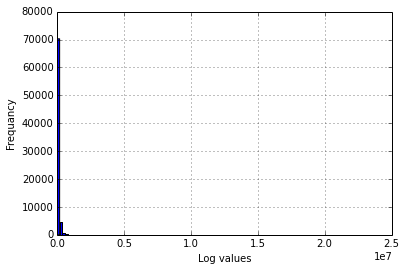

In [19]:
train.var38.hist(bins=110)
plt.xlabel("Log values")
plt.ylabel("Frequancy")

In [20]:
print ("Variable data:", '\n')
train.var38.nonzero

('Variable data:', '\n')


<bound method Series.nonzero of 0      39205.170000
1      49278.030000
2      67333.770000
3      64007.970000
4     117310.979016
5      87975.750000
6      94956.660000
7     251638.950000
8     101962.020000
9     356463.060000
10    125424.060000
11     75368.520000
12    122220.090000
13    118436.970000
14     95294.130000
...
76005     64250.460000
76006    117310.979016
76007     83667.150000
76008     73056.000000
76009    176712.420000
76010    165616.320000
76011    128887.380000
76012    117310.979016
76013     31405.080000
76014     90214.170000
76015     60926.490000
76016    118634.520000
76017     74028.150000
76018     84278.160000
76019    117310.979016
Name: var38, Length: 76020, dtype: float64>

## Comment: 
- Are the variable contains no zeros, as its nonzero elements length equals to the length of the whole dataset .. 

- However, the histogram representation is a little bit unclear and skewness is abviously seen .. this might be becuase it's drawn on large scale for the x-axis (10^7) where most of the data points have small values ..

- The skewness of this variable could be reduced if we look at from a different prespective .. i.e. taking the log for its elements .. 


/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


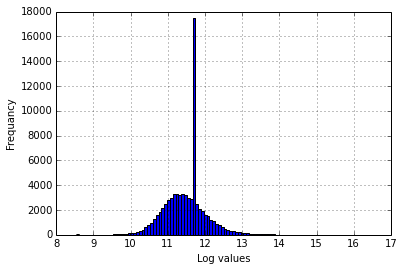

In [21]:
train.var38.map(np.log).hist(bins=110)
plt.xlabel("Log values")
plt.ylabel("Frequancy")

## Comment:
- Skewness is elemented and a normal shape is appeared .. 

- There is a value that repeated frequanctly than the other data points .. this is obviously seen from the histogram .. 

- What is this frequantly occured value and what if it's removed ?!!

In [22]:
train.var38.value_counts()

/usr/lib/python2.7/dist-packages/pandas/core/series.py:1807: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  good = -bad


117310.979016    14868
451931.220000       16
463625.160000       12
104563.800000       11
288997.440000       11
236690.340000        8
128318.520000        7
125722.440000        7
104644.410000        7
329603.970000        7
67088.310000         7
105260.880000        6
100466.730000        6
163432.470000        6
70813.800000         6
...
604016.37    1
35197.68     1
125830.26    1
81818.31     1
68795.01     1
38363.13     1
271915.29    1
152038.59    1
80511.42     1
169035.57    1
145910.37    1
317976.42    1
125150.46    1
46617.09     1
19546.50     1
Length: 57736, dtype: int64

## Comment: 
The most frequant value is "117310.979016" that occurs "14868" times .. 

/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


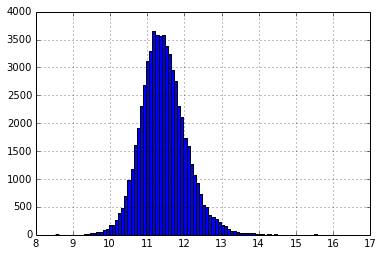

In [23]:
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100)

## Comment:
Removing the most frequant value has significant effect on normlizing the shape of the histogram .. 

# - Var15 

- This is one of the most significant variables as proved in https://www.kaggle.com/c/santander-customer-satisfaction/forums/t/19291/data-dictionary/110414#post110414



In [24]:
print "Statistical Analysis for Var15: ", '\n'
train['var15'].describe() 

Statistical Analysis for Var15:  



/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

Histogram .. 



/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


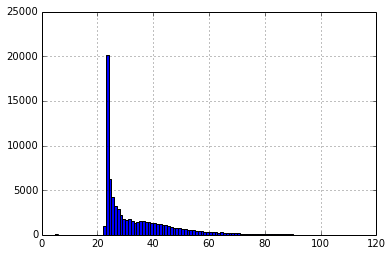

In [25]:
print "Histogram ..", '\n'
train['var15'].hist(bins=100)

## Comment:
- Skewed variable !! .. 
- Let's print the most frequant value and check the skewness when it is removed .. 

In [26]:
train.var15.value_counts()

/usr/lib/python2.7/dist-packages/pandas/core/series.py:1807: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  good = -bad


23    20170
24     6232
25     4217
26     3270
27     2861
28     2173
31     1798
29     1727
30     1640
32     1592
36     1546
35     1536
34     1489
37     1401
38     1390
...
13     11
12     11
20      9
8       9
96      7
7       6
95      6
99      6
100     6
102     4
97      3
104     2
98      1
105     1
101     1
Length: 100, dtype: int64

## Comment:
The most frequant value is 23 that occurs 20170 times .. 

/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


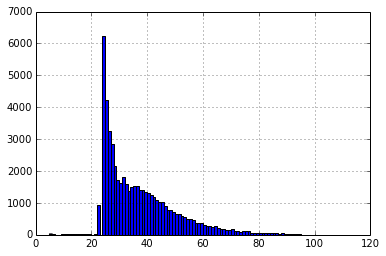

In [27]:
train.loc[~np.isclose(train.var15, 23), 'var15'].hist(bins=100)

## Comment:
- The skewness is still there !! .. 
- What about taking the log for this variable to shrick the gaps between its values .. 

/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


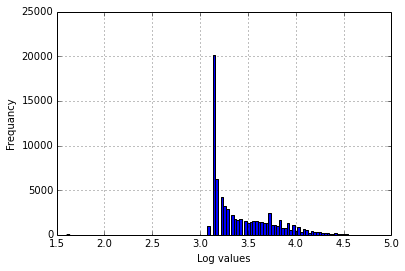

In [28]:
train.var15.map(np.log).hist(bins=110)
plt.xlabel("Log values")
plt.ylabel("Frequancy")

/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


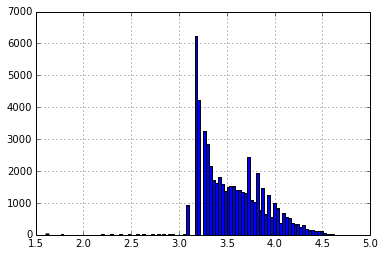

In [29]:
train.loc[~np.isclose(train.var15, 23), 'var15'].map(np.log).hist(bins=100)

## Comment:
The skewness is still there, but the gaps between these data points are somehow minimized ! 

# Var36 ..

In [30]:
print "Statistical Analysis for Var36: ", '\n'
train['var36'].describe() 

Statistical Analysis for Var36:  



/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


count    76020.000000
mean        40.449079
std         47.362719
min          0.000000
25%          2.000000
50%          3.000000
75%         99.000000
max         99.000000
Name: var36, dtype: float64

Histogram .. 



/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


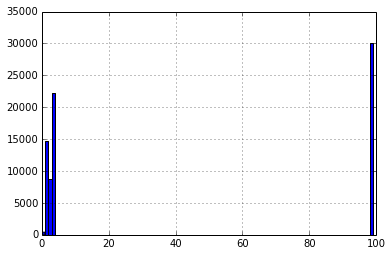

In [31]:
print "Histogram ..", '\n'
train['var36'].hist(bins=100)

## Comment:
- The huge gap between the data points (either very small like 1or 2 or very large like 99) .. causes the histogram to be as resulted .. 

- Taking the log is not allowed here becuase of this huge difference .. 

- Thus, what about looking to the variable from another prespective with respect to the target variable ?!

/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


array([<matplotlib.axes.AxesSubplot object at 0x7f06d2beb550>,
       <matplotlib.axes.AxesSubplot object at 0x7f06d1c48250>], dtype=object)

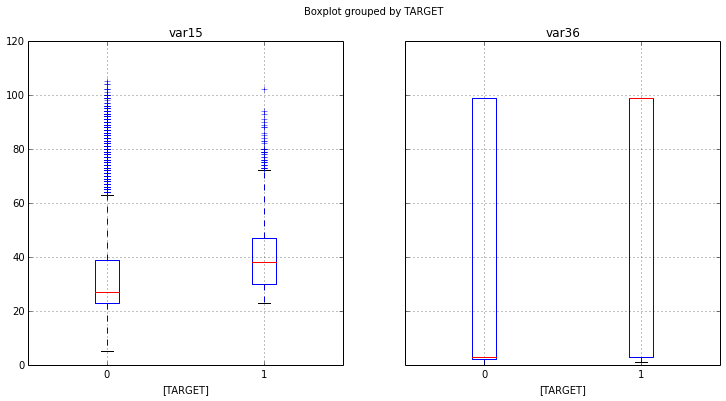

In [32]:
train[['var15','var36','TARGET']].boxplot(by="TARGET", figsize=(12, 6))

## Comment:
- The plot is made for another variable as well to be able to figure out the difference and hence, more understanding will be obtained .. 

- The boxplot already confirms the huge difference between the data points related to var36 compared to the almost balanced var15

## Correlation:
What is the correlation between these significant variables ?!

In [33]:
print "Correlation between Var36, Var38:", '\n'
np.corrcoef(train['var36'], train['var38'])

Correlation between Var36, Var38: 



array([[ 1.        ,  0.02174471],
       [ 0.02174471,  1.        ]])

In [34]:
print "Correlation between Var36, Var15:", '\n'
np.corrcoef(train['var36'], train['var15'])

Correlation between Var36, Var15: 



array([[ 1.        , -0.14534212],
       [-0.14534212,  1.        ]])

In [35]:
print "Correlation between Var38, Var15:", '\n'
np.corrcoef(train['var38'], train['var15'])

Correlation between Var38, Var15: 



array([[ 1.        ,  0.00649659],
       [ 0.00649659,  1.        ]])

## Comment:
- There is a weak linear relationship between Var15, Var36 .. and Var15, Var38 while there is stronger linear relationship between Var15, Var36 

- A reverse relationship between Var15, Var36 which means whenever one of them increases, the other one decreases .. 

# 2. Feature Selection: 

Feature selection will be applied by PCA .. 
the more variance of the PC, the more rank it'll have !
I gonna test on the most common number of PCs (10) ..

In [36]:
pca = PCA(n_components=10)
pca.fit(X)
PCA(copy=True, n_components=10, whiten=False)
print(pca.explained_variance_ratio_) 

[ 0.61906992  0.15290912  0.07256307  0.06331558  0.03537318  0.02904103
  0.00873734  0.00598033  0.00503617  0.00168048]


## - Comment: 
- It's obvious that only the 1st two principle components have the highest variance .. 
- then, this data may be represented using only two principles ! 
- These ouput numbers represent the eign values .. it indicates the level of variation of the data in each PC .. 
i.e. the 1st PC contains about 62% of the data  

## Let's try to display this component that has the max. variance .. 

In [37]:
first_pc = pca.components_[0]
second_pc = pca.components_[1]
print first_pc

[  1.25513398e-07   1.08650106e-07   1.14136223e-09   1.65545141e-07
  -1.60769913e-09  -4.13847619e-09   9.95983299e-11  -1.12821047e-11
  -2.94097562e-11  -4.04064518e-11   1.04945566e-11  -1.70729746e-09
  -4.12719409e-09  -2.86798021e-09  -5.29476528e-09  -4.59152873e-09
  -2.89738997e-09  -5.33517173e-09  -4.58103417e-09  -3.39854278e-10
   1.69569501e-12   3.08627054e-13   0.00000000e+00   0.00000000e+00
  -9.40222225e-14  -5.08249472e-12  -7.09327301e-15  -1.87369950e-15
   5.53294992e-13   8.54960613e-13   1.67947316e-11   4.33742855e-12
   6.74565254e-11   5.14056958e-11   5.11944295e-11   1.83021448e-11
   1.79214585e-11  -1.87369951e-15  -1.87369951e-15   6.74324664e-11
   1.46974374e-11   3.32092724e-12   2.74727058e-13   1.06597695e-13
  -1.87879956e-15  -1.87879956e-15   1.24341094e-12  -2.58570533e-13
  -1.92054200e-13   2.58787808e-12   1.17857632e-12   4.37121049e-13
   3.72641109e-13   3.56551970e-13   3.72641109e-13   4.43841690e-13
   4.43841690e-13   0.00000000e+00

In [38]:
transformed_data = pca.transform(X)  # contains the input features ..
print "The transformed data looks like : ", '\n', transformed_data

The transformed data looks like :  
[[ -6.90247887e+07  -1.54220893e+07   7.75921787e+06 ...,  -3.11853856e+04
    3.31669881e+04   1.52940385e+02]
 [ -6.90247901e+07  -1.54220893e+07   7.75921786e+06 ...,  -3.11853794e+04
    3.31670191e+04   1.52708512e+02]
 [ -6.90247887e+07  -1.54220893e+07   7.75921785e+06 ...,  -3.11853512e+04
    3.31670710e+04   1.52293400e+02]
 ..., 
 [ -6.90247887e+07  -1.54220893e+07   7.75921779e+06 ...,  -3.11854374e+04
    3.31671662e+04   1.51859148e+02]
 [ -6.90247886e+07  -1.54220893e+07   7.75921778e+06 ...,  -3.11854248e+04
    3.31671964e+04   1.51623388e+02]
 [ -6.90247886e+07  -1.54220892e+07   7.75921776e+06 ...,  -3.11853842e+04
    3.31672936e+04   1.50863608e+02]]


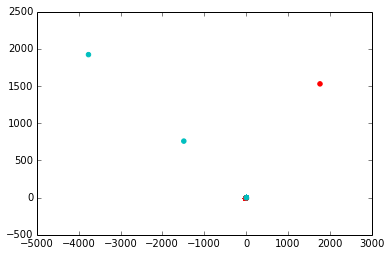

In [40]:
for ii, jj in zip(transformed_data, X):
    plt.scatter(first_pc[0]*ii[0], first_pc[1]*ii[0], color = "r")   
    plt.scatter(second_pc[0]*ii[1], second_pc[1]*ii[1], color = "c")
#     plt.scatter(jj[0],jj[1])

## Comment:
- This graph shows the direction of each of the principle components ..
- It's obvious that they are perpendicular to each other .. 
- I wish I could plot the original features on the same plot, but it do give an error !

## - Splitting data into training and validation .. 

(80, 20) Cross Validation will  be applied .. hence, 80% for training and 20% testing 

(50, 50) CV will also be applied and their results will be compared to check id the size of the data matters

In [41]:
indeces = np.arange(len(data))
np.random.shuffle(indeces)
data = data[indeces]
training_data = data[0:int(0.7*len(data))]
validation_data = data[int(0.7*len(data))+1:int(0.85*len(data))]
test_data = data[int(0.85*len(data))+1:]

The output of this split is .. 

In [42]:
print "training_data: ", len(training_data)
print "validation_data:", len(validation_data)
print "test_data: ", len(test_data)

training_data:  53214
validation_data: 11402
test_data:  11402


## 3. Classification task ..

- Goal: 
Classify the customers into (Satisfied "0", Unsatisfied "1") according to their corresponding indpendent variables values .. 

- Methods Used: 
    1. Logistic Regression 
    2. ANN
    3. Decision Tree "Random Forest" 

## 1. Logistic Regression Classifier: 

In [43]:
logistic = LogisticRegression().fit(training_data[:,1:-1],training_data[:,-1])
validation_error = logistic.score(validation_data[:,1:-1], validation_data[:,-1]) 
test_error = logistic.score(test_data[:,1:-1], test_data[:,-1]) #get_error(logistic)
display(str.format("{} training samples : validation accuracy = {}, test accuracy = {}",training_data.shape[0], validation_error, test_error))

'53214 training samples : validation accuracy = 0.960094720225, test accuracy = 0.960270128048'

## Comment:
- This data contains skewed classes where most of the target outcome is 0 (~ 96%)
- The classification accuracy for the validation set is (~ 96.1%) while it is (~ 96.4%) for the test set 
- So far we still need to evaluate the model differently (i.e. displying the confusion matrix, calculating Percision and recall) 

## Confusion Matrix .. 

In [44]:
y_true = validation_data[:,-1]
y_pred = logistic.predict(validation_data[:,1:-1])

In [45]:
cm = confusion_matrix(y_true, y_pred)
print "Confusion Matrix: ", '\n', cm

Confusion Matrix:  
[[10947     0]
 [  455     0]]


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2645: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


## Comment:
- The confusion matrix consists of two rows (represent the actual classes) and the two columns (represent the predicted classes) .. 
- By observing the results of the confusion matrix related to logistic regression model, we could notice that the classifier could correctly predict most of the unsatified customers but unfortunetly it couldn't predict any of the satosfied customers correctly ... 
- Yet, we still need to evaulate it using percision, recall calculations ..

## Calculating Precision / Recall
### Percision: 
Is defined as the number of true positives over (the number of true positives plus the number of false positives)

### Recall:
Is defined as the number of true positives over (the number of true positives plus the number of false negatives)

### F_score:
It is the harmonic mean of precision and recall ..

F1 = 2*[(P * R)/(P+R)]

In [46]:
precision_recall_fscore_support(y_true, y_pred, average='binary')

(0.0, 0.0, 0.0, 455)

## Comment: 

- Binary label: means that only report results for the class specified by pos_label
- this ensure that logistic regression fails to predict non of the positive class 
- The last value of 441 refers to the number of observation with value 1 and predicted as zero !

## Work on selective features .. 
- One of the solutions for this problem is to work on less dimentions that are proved to be effective in predicting the class label ..
- For simplicity and quick check we just select features resulted from the trails of other participants in the competition .. 
- As a future work, I will try to work on the resulted features from the PCA  

# selective features 
ind_var5 -> 27 <br>
ind_var30 -> 64 <br>
var15 -> 2 (categorical?)

In [47]:
indeces = [2,27, 64]
logistic = LogisticRegression().fit(training_data[:,indeces],training_data[:,-1])
validation_error = logistic.score(validation_data[:,indeces], validation_data[:,-1]) 
test_error = logistic.score(test_data[:,indeces], test_data[:,-1]) #get_error(logistic)
display(str.format("{} training samples : validation error = {}, test error = {}",training_data.shape[0], validation_error, test_error))

'53214 training samples : validation error = 0.960094720225, test error = 0.960270128048'

In [48]:
y_true = validation_data[:,-1]
y_pred = logistic.predict(validation_data[:,indeces])
precision_recall_fscore_support(y_true, y_pred, average='binary')

(0.0, 0.0, 0.0, 455)

## Comment:
- Working of the selected subset of features makes no difference .. ! 
- The 2nd step may be to try another classifier (i.e. ANN) .. 

## Summary: 

In [49]:
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.96      1.00      0.98     10947
    class 1       0.00      0.00      0.00       455

avg / total       0.92      0.96      0.94     11402



/usr/lib/python2.7/dist-packages/sklearn/metrics/metrics.py:1905: UserWarning: The sum of true positives and false positives are equal to zero for some labels. Precision is ill defined for those labels [ 1.]. The precision and recall are equal to zero for some labels. fbeta_score is ill defined for those labels [ 1.]. 
  average=None)


## - Plotting ROC curve and AUC

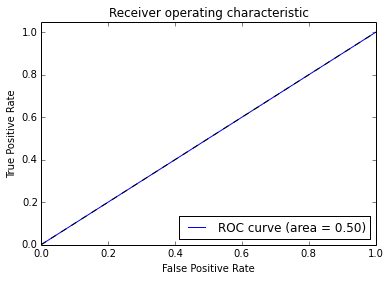

In [50]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in xrange(len(y_pred)):
    fpr[i], tpr[i], _ = roc_curve(y_true,y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 2. ANN

In [51]:
batch_size = 128
hidden_layer_size = 1024

nVars = len(indeces)#training_data.shape[1]-2 # 369
num_labels = 2

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, nVars))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size,num_labels))
  tf_valid_dataset = tf.constant(validation_data[:,indeces].astype(np.float32))
  tf_valid_labels = tf.constant(validation_data[:,-1].astype(np.float32))
  tf_test_dataset = tf.constant(test_data[:,indeces].astype(np.float32))
  tf_test_labels = tf.constant(test_data[:,-1].astype(np.float32))
  

  # Variables.
  weights1 = tf.Variable(
    tf.truncated_normal([nVars, hidden_layer_size]))
  biases1 = tf.Variable(tf.zeros([hidden_layer_size]))
    
  weights2 = tf.Variable(
    tf.truncated_normal([hidden_layer_size, num_labels]))
  biases2 = tf.Variable(tf.zeros([num_labels]))
    
  hidden_layer = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1) 
#   hidden_layer = tf.nn.dropout(hidden_layer, 0.5)
    
  # Training computation.
  logits = tf.matmul(hidden_layer, weights2) + biases2
    #tf.nn.l2_loss(logitis- tf_train_labels)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

  # L2 regularization for the fully connected parameters.
  regularizers = (tf.nn.l2_loss(weights1) + tf.nn.l2_loss(biases1) +
                  tf.nn.l2_loss(weights2) + tf.nn.l2_loss(biases2))
  # Add the regularization term to the loss.
  beta = 5e-4
#   loss += beta * regularizers
  
  # Optimizer.
  global_step = tf.Variable(0)  # count the number of steps taken.
  learning_rate = tf.train.exponential_decay(0.01, global_step, 300, 0.96)
  optimizer = tf.train.GradientDescentOptimizer(0.0001).minimize(loss, global_step=global_step)
  
  # Predictions for the training, validation, and test data.
  train_prediction = logits
  valid_hidden_layer = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1) 
  valid_prediction = tf.matmul(valid_hidden_layer, weights2) + biases2
  test_hidden_layer = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1) 
  test_prediction = tf.matmul(test_hidden_layer, weights2) + biases2

In [52]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [53]:
def run_optimizer():
    num_steps = 4001
    
    validation_labels = validation_data[:,-2:].astype(np.float32)
    validation_labels[:,0] = 1- validation_labels[:,1]
    test_labels = validation_data[:,-2:].astype(np.float32)
    test_labels[:,0] = 1- test_labels[:,1]

    with tf.Session(graph=graph) as session:
      tf.initialize_all_variables().run()
      print("Initialized")
      for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (training_data.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = training_data[offset:(offset + batch_size),indeces].astype(np.float32)
        batch_labels = np.reshape(training_data[offset:(offset + batch_size),-2:], [batch_size,2]).astype(np.float32)
        batch_labels[:,0] = 1- batch_labels[:,1]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run(
          [optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
          print("Minibatch loss at step %d: %f" % (step, l))
          print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
          print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), validation_labels))
      test_pred = test_prediction.eval()
      print("Test accuracy: %.1f%%" % accuracy(test_pred, test_labels))
      y_true = test_labels[:,1]
      y_pred = np.argmax(test_pred, 1)
      precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
      print("Precision: %.1f, Recall: %.1f, F-score: %.1f " % (precision, recall, fscore))

In [54]:
run_optimizer()

Initialized
Minibatch loss at step 0: 9.395432
Minibatch accuracy: 97.7%
Validation accuracy: 96.0%
Minibatch loss at step 500: 2.377729
Minibatch accuracy: 95.3%
Validation accuracy: 96.0%
Minibatch loss at step 1000: 0.469960
Minibatch accuracy: 70.3%
Validation accuracy: 96.0%
Minibatch loss at step 1500: 6.207842
Minibatch accuracy: 94.5%
Validation accuracy: 96.0%
Minibatch loss at step 2000: 8.251621
Minibatch accuracy: 94.5%
Validation accuracy: 96.0%
Minibatch loss at step 2500: 5.747937
Minibatch accuracy: 96.1%
Validation accuracy: 96.0%
Minibatch loss at step 3000: 0.580570
Minibatch accuracy: 97.7%
Validation accuracy: 96.0%
Minibatch loss at step 3500: 4.246640
Minibatch accuracy: 96.1%
Validation accuracy: 96.0%
Minibatch loss at step 4000: 0.832232
Minibatch accuracy: 94.5%
Validation accuracy: 96.0%
Test accuracy: 95.9%
Precision: 0.0, Recall: 0.0, F-score: 0.0 


## Comment: 
- So far ANN is very similar to logistic regression (may be because of skewed classes in the data)
- We need a better approach to handle this case
- Decision tree classifier might be chosen ..

## 3. Decision Tree: 

### 3.1. Training phase:

In [55]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_data[:,indeces],training_data[:,-1])
clf

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, min_density=None,
            min_samples_leaf=1, min_samples_split=2, random_state=None,
            splitter='best')

### 3.2. Validation phase: 

In [56]:
y_true = validation_data[:,-1]
y_pred = clf.predict(validation_data[:,indeces])

## - Evaluation Process ..

In [57]:
precision_recall_fscore_support(y_true, y_pred, average='binary')

(0.0, 0.0, 0.0, 455)

In [58]:
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.96      1.00      0.98     10947
    class 1       0.00      0.00      0.00       455

avg / total       0.92      0.96      0.94     11402



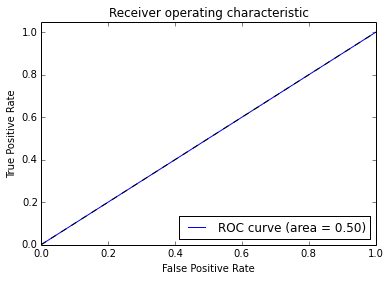

In [59]:
for i in xrange(len(y_true)):
    fpr[i], tpr[i], _ = roc_curve(y_true, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Comment:
- Deicion Tree classifier could classify most of the cases correctly .. 
- Percision, Recall and F_score are calculated as evaluation methods .. 
- We still can do better by working on less number of features (effective ones) .. 

## Conclusion: 
- This problem is a classification problem for customers into (Satisfied and Unsatisfied) ones .. 
- There are about 369 input variables and only one output (two class) variable ..
- Logistic regression, ANN, DT classifiers are applied ..
- DT outperformed the other two methods .. and this is proved via calculating the classification accuracy, percision, recall and F_score values .. 
- So far, we can do better by applying some preprocessing steps perior to the modeling phase (i.e. solve the issue of imbalnaced dataset) .. and this can be proven by printing the count of each class

In [60]:
train.TARGET.value_counts()

/usr/lib/python2.7/dist-packages/pandas/core/series.py:1807: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  good = -bad


0    73012
1     3008
dtype: int64

## Comment:
There is a big difference between the count of satisfied and unstisfied customers (0,1) .. 

## Future work: 
- The analysis on certain / selected variables .. 
- Correlation between the variables .. 
- Plotting the variables vs each other as well as doing some informative plots ..
- classification on selected features (resulted from PCA)

# Back to Data Preporcessing phase: 
As mentioned earlier, we can improve the classification results and make them more robust by solving the problem of impbalanced dataset and focus on the relationship between the input variables .. 

## Imbalnced dataset - solutions:
1. Over sampling: 
Sampling the data related to the less clasified class to increase its records ..

2. Under sampling: 
Remove some records from the over classified class to decrease its records .. 

Asume we gonna apply Under sampling .. 

## Relationships between variables .. 
According to these trails .. 
https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223

We can find that some variables may sum to up other varibales .. this may justify the high corrrelation between them .. 
var05, var08, var06/29, var20, var24, var14 and var13. These sum up to var30

In [61]:
combined_variables = np.sum(train.num_var5)+ np.sum(train.num_var8) + np.sum(train.num_var6) + np.sum(train.num_var20) + np.sum(train.num_var24) + np.sum(train.num_var14) + np.sum(train.num_var13) 
combined_var30 = sum(train.num_var30)
print "Combined variables: ", combined_variables
print "Equivalent variable (var30): ", combined_var30

Combined variables:  181146
Equivalent variable (var30):  181146


In [62]:
# var17, var44, var33. These sum up to var31
combined_variables = np.sum(train.num_var17) + np.sum(train.num_var44) + np.sum(train.num_var33)
combined_var31 = sum(train.num_var31)
print "Combined variables: ", combined_variables
print "Equivalent variable (var31): ", combined_var31

Combined variables:  1221
Equivalent variable (var31):  1221


In [63]:
# var25, var32. These sum up to var26

combined_variables = np.sum(train.num_var25) + np.sum(train.num_var32)
combined_var26 = sum(train.num_var26)
print "Combined variables: ", combined_variables
print "Equivalent variable (var26): ", combined_var26

Combined variables:  6795
Equivalent variable (var26):  6795


In [64]:
# var40, var41, var18, var34. These sum up to var01

combined_variables = np.sum(train.num_var40) + np.sum(train.num_var41) + + np.sum(train.num_var34) + + np.sum(train.num_var18)
combined_var1 = sum(train.num_var1)
print "Combined variables: ", combined_variables
print "Equivalent variable (var1): ", combined_var1

Combined variables:  861
Equivalent variable (var1):  861


/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


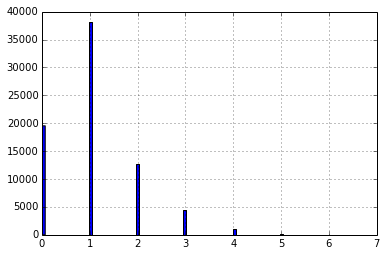

In [65]:
train.num_var4.hist(bins=100)

## Digging deeper in Var3 .. 
This variable contains no zeros .. hence, probably it's one of the most essential variables during the analysis ..  
hence, we have to give it a focus .. 

In [66]:
print "Counting the occurance of values in var3:"
train['var3'].value_counts()

Counting the occurance of values in var3:


/usr/lib/python2.7/dist-packages/pandas/core/series.py:1807: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  good = -bad


 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
 6            82
 0            75
 10           72
 11           66
 5            63
...
119    1
79     1
182    1
181    1
210    1
40     1
211    1
84     1
213    1
178    1
177    1
87     1
151    1
215    1
191    1
Length: 208, dtype: int64

## Comment:
- This variable takes +ve values except the value of (-999999) .. this value might replace missing values ! .. 

- Hence, if we replace it with the most common value instead of this large negative number, this might help .. 

- Assume we gonna replace it with the value of (2) 
    - Ref: https://www.kaggle.com/cast42/santander-customer-satisfaction/debugging-var3-999999/comments
   
   
- Motivation: 
var3 is probably country of residence: https://www.kaggle.com/c/santander-customer-satisfaction/forums/t/19367/var3/111169#post111169 As far I have seen, var3 is uncorrelated with the target variable. Hence, it does not improve AUC with XGBOOST or RFC. But if var3 was important , correct imputation of outliers could improve the classification i guess. But replacing the unknowns with 2 does not make it worse either ;-)

In [67]:
train = train.replace(-999999,2)

/usr/lib/python2.7/dist-packages/pandas/core/common.py:356: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  nonna = values_to_mask[-na_mask]
/usr/lib/python2.7/dist-packages/pandas/core/common.py:356: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  nonna = values_to_mask[-na_mask]


In [68]:
train['var3'].value_counts()

/usr/lib/python2.7/dist-packages/pandas/core/series.py:1807: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  good = -bad


2     74281
8       138
9       110
3       108
1       105
13       98
7        97
4        86
12       85
6        82
0        75
10       72
11       66
5        63
14       61
...
119    1
79     1
182    1
181    1
210    1
40     1
211    1
84     1
213    1
178    1
177    1
87     1
151    1
215    1
191    1
Length: 207, dtype: int64

## What about Var15 .. 
Probably, this variable represents the Age of the customers .. in fact, we don't care about figuring out the idenification of the variable under study but let's dig deeper in this variable .. 

In [69]:
train['var15'].describe()

/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

/usr/lib/python2.7/dist-packages/pandas/core/common.py:276: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res


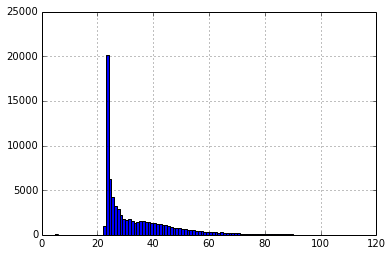

In [70]:
train['var15'].hist(bins=100)

Very Skewed shape !! .. 

In [71]:
input_variables = [train.num_var30, train.num_var31, train.num_var26, train.num_var1]
np.transpose(input_variables)

array([[0, 0, 0, 0],
       [3, 0, 0, 0],
       [3, 0, 0, 0],
       ..., 
       [3, 0, 0, 0],
       [3, 0, 0, 0],
       [0, 0, 0, 0]])

In [72]:
indeces = [140,142, 118, 89]
logistic = LogisticRegression().fit(training_data[:,indeces],training_data[:,-1])
validation_error = logistic.score(validation_data[:,indeces], validation_data[:,-1]) 
test_error = logistic.score(test_data[:,indeces], test_data[:,-1]) #get_error(logistic)
display(str.format("{} training samples : validation error = {}, test error = {}",training_data.shape[0], validation_error, test_error))

'53214 training samples : validation error = 0.959919312401, test error = 0.960270128048'

In [73]:
y_true = validation_data[:,-1]
y_pred = logistic.predict(validation_data[:,indeces])
precision_recall_fscore_support(y_true, y_pred, average='binary')

(0.0, 0.0, 0.0, 455)

In [74]:
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.96      1.00      0.98     10947
    class 1       0.00      0.00      0.00       455

avg / total       0.92      0.96      0.94     11402



/usr/lib/python2.7/dist-packages/sklearn/metrics/metrics.py:1905: UserWarning: The precision and recall are equal to zero for some labels. fbeta_score is ill defined for those labels [ 1.]. 
  average=None)


## Comment: 
- No better results have been obtained by depending on the combined variables .. !!
- So far, the learning process has been made on the selected features from other Kaggle compitators and also by depending on some of the consolidated features ..
- Hence, probably the problem is not in the input variables but the baisness on the output class variable that contains lots of satisfied customers .. 
- The next step is to solve the "imbalanced classes" problem.. 

## - Undersampling: 
which means removing data from the over classified (Biased) class such that the selected number of records from both classes are almost equal .. this will guarntee the fairness of the learning alagorithm .. 

In [75]:
sample_size = train.TARGET.value_counts()[1]
unsatisfied_indices = train[train.TARGET==1].index # index of zeros
unsatisfied_sample = train.loc[train.TARGET==1] #data of unsatosfied customers

Satisfied_indices = train[train.TARGET==0].index
random_indices = np.random.choice(Satisfied_indices, sample_size, replace=False)
Satisfied_sample = train.loc[random_indices]

merged_sample = pd.concat([Satisfied_sample, unsatisfied_sample], ignore_index=True)
print(merged_sample) 

/usr/lib/python2.7/dist-packages/pandas/core/series.py:1807: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  good = -bad


        ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0    81940     2     23                0.00                     0.00   
1   114763     2     42                0.00                   194.91   
2    53996     2     25                0.00                     0.00   
3   138177     2     29              105.00                    61.20   
4    68711     2     25                0.00                     0.00   
5    87264     2     25                0.00                     0.00   
6    82984     2     23                0.00                     0.00   
7    26129     2     23                0.00                     0.00   
8    69721     2     35                0.00                     0.00   
9    13728     2     30                0.00                     0.00   
10   62486     2     24                0.00                     0.00   
11  102548     2     24                0.00                     0.00   
12   41306     2     32               30.00                     

# Learning Phase after "Under_sampling":
As Logistic regression and Deicion Tree algorithms obtained the worest and best results respectvely, we gonna only reimplement them after applying the under_sampling on the data to check its effect on the learning reults 

## 1. Logistic Regression .. 

In [76]:
indeces = np.arange(len(merged_sample))
# np.random.shuffle(indeces)
# data = data[indeces]
training_data = merged_sample[0:int(0.7*len(merged_sample))]
validation_data = merged_sample[int(0.7*len(merged_sample))+1:int(0.85*len(merged_sample))]
test_data = merged_sample[int(0.85*len(merged_sample))+1:]

In [77]:
logistic = LogisticRegression().fit(training_data.values, training_data.TARGET)
validation_error = logistic.score(validation_data.values, validation_data.TARGET) 
test_error = logistic.score(test_data.values, test_data.TARGET) #get_error(logistic)
display(str.format("{} training samples : validation accuracy = {}, test accuracy = {}",training_data.shape[0], validation_error, test_error))

'4211 training samples : validation accuracy = 0.0, test accuracy = 0.0'

## - Validation phase .. 

In [78]:
y_true = validation_data.TARGET
y_pred = logistic.predict(validation_data.values)

In [79]:
cm = confusion_matrix(y_true, y_pred)
print "Confusion Matrix: ", '\n', cm

Confusion Matrix:  
[[  0   0]
 [901   0]]


## Precision, Recall, and F-score .. 

In [80]:
precision_recall_fscore_support(y_true, y_pred, average='binary')

(0.0, 0.0, 0.0, 901)

## Comment:
After applying undersampling and classify the data points using Logistic regression .. The results are still bad !! .. 
The confusion matrix shows that the learning algorithm misclassified ALL the satisfied customers, although it begins to detect the unsatisfied customers correctly

## 2. Decision Tree: 
Let's try another algorithm which is "Decision Tree - DT" 

In [81]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_data.values,training_data.TARGET)
clf

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, min_density=None,
            min_samples_leaf=1, min_samples_split=2, random_state=None,
            splitter='best')

In [82]:
y_true = validation_data.TARGET
y_pred = clf.predict(validation_data.values)

In [83]:
precision_recall_fscore_support(y_true, y_pred, average='binary')

(1.0, 1.0, 1.0, 901)

## Comment:

- Applying Undersampling to the data helps enhancing the performance of Decision Tree

- The results of Precision, Recall, F-score, and sample weight have been enhanced (higher values indicate better performance) 

- However the classification results of Logistic Regression is less than the expectations (0.001 for validation set) .. !

# Testing Phase: 
Now, I gonna test the Decision Tree algorithm on the test set file assocaited with the challenge as it obtained the best results so far amonest (Logistic Regression and ANN) .. 

In [441]:
data =np.genfromtxt('test.csv', delimiter=',',skip_header=True)

In [442]:
print "Size of the data .. ", data.shape

Size of the data ..  (75818, 370)


In [452]:
test = pd.read_csv("test.csv")

In [453]:
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,
0,2,2,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
1,5,2,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
2,6,2,23,0,0,0,0,0,0,0,0,0,0,60,60,60,60,60,60,0,...
3,7,2,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
4,9,2,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...


In [ ]:
y_pred = clf.predict(test.values)

In [ ]:
with open('test.csv', 'a') as the_file:
    the_file.write(y_pred)
f.close()

# Conclusion and Future Work:
- This challenge is related to "Santander Customer Satisfaction" Kaggle Competition 
- Data preprocessing phase is applied to understand the nature of the data 
- The learning phase is applied through three learning algorithms (Logistic Regression, ANN, and Decision Tree)
- Logistic Regression was the worest and Decision Tree with the best although the classification results are still unsatisfied (almost zero) although the results of precision and recall of Decision tree was a little bit better 
- Data Under_sampling is performed .. 
- The learning results for Decision tree became a little bit better after the under_sampling 
- Decision Tree algorithm is applied on the test data 

- As a future work, the alogrithms might been applied on the reduced features results from the feature reduction phase
- This expect to enhance the classification results as the learning will be in a feature space instead of the input data space 